## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo III - Arquiteturas de CNNS e treinamento de redes profundas</span>


### <span style="color:darkred">Exercícios</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

---

## Parte 1 - Exercícios Essenciais

---

### Exercício 1)

Considere as funções de custo: Perda Quadrática (MSE), Erro Absoluto (MAE), Perda 0-1, Perda Hinge/SVM, Entropia Cruzada. Para referência veja a definição da Perda 0-1 e Hinge, não vistas em aula, abaixo. Pesquise mais sobre essas caso necessário

*. Perda 0-1

$$\frac{1}{N} \sum_{i=1}^N 
\left\{
	\begin{array}{ll}
		0  & \mbox{if } y_i = \hat{y}_i \\
		1 & \mbox{if } y_i \neq \hat{y}_i 
	\end{array}
\right.$$

*. Perda SVM/Hinge
 
$$\frac{1}{N} \sum_{i=1}^N \max(0, 1- y^{h}_i\cdot f(x_i)),$$
essa função considera que as classes são -1 e 1, sendo $f(x_i)=\hat{y}_i^{h}$ um valor de saída considerando valores negativos (os quais gerarão classificação para a classe -1) e positivos (classificação para a classe 1). Portanto será preciso adaptar as classes do problema e a  saída $\hat{y}^{h}$ para esse cenário da seguinte forma:
* $y^{h} \in \{-1,1\}$, e
* $\hat{y}^{h} = 2\cdot(\hat{y}-0.5)$,
sendo $\hat{y}$ a probabilidade de uma instância pertencer à classe positiva (1).

Para um determinado problema, como escolher qual delas utilizar no treinamento de uma rede neural?

(a) Na dúvida escolher sempre a entropia cruzada, pois é a mais popular e considerada um padrão na literatura da área de redes neurais<br>
(b) É necessário considerar um subconjunto pequeno de exemplos e sempre testar todas as funções de custo disponíveis, só assim é possível ter certeza de que estaremos selecionando a função mais adequada para o problema em mãos<br>
<font color='red'>(c) Avaliar o problema em termos de suas saídas e os valores possíveis para a função de custo, selecionando para realizar experimentos aquelas que mais se adequem ao problema e seja conveniente para realizar otimização baseada em gradiente</font><br>
(d) Em geral, a entropia cruzada deve ser utilizada para problemas de classificação, e a perda quadrática para problemas de regressão, não sendo necessário investigar outras funções de custo pois são mais relevantes outros parâmetros como a taxa de aprendizado e o tamanho do batch<br>

A função de custo ou perda deve ser escolhida analisando se forma uma região convexa, ou seja, se é diferenciável para que possa-se buscar o mínimo do gradiente.<br>
Idealmente deve ser suave e produzir um gradiente convexo.<br>
As funções mais comuns são o MSE para valores contínuos e a cross_entropy para probabilidades.<br>
a-Entropia cruzada não é indicada para regressão.<br>
b-muito difícil testar todas as funções de custo (existem muitas funções).<br>
d.NLP por exemplo tem função de custo específica, ou seja, depende do problema existe uma função de custo mais indicada.<br>

---
### Exercício 2)

Considerando as funções de perda: entropia cruzada categórica e perda quadrática, qual é o valor das perdas para um exemplo arbitrário no caso o modelo considere as classes equiprováveis numa tarefa de classificação de 5 classes?

<font color='red'> (a) Entropia Cruzada = 1.6; Quadrática = 0.8</font><br>
 (b) Entropia Cruzada = 2.3; Quadrática = 0.8<br>
 (c) Entropia Cruzada = 1.6; Quadrática = 0.16<br>
 (d) Entropia Cruzada = 0.32; Quadrática = 0.8<br>
  
DICA: compare dois vetores de probabilidade, um com a classe real em *one-hot-encoding* e o outro exemplificando o caso de classes equiprováveis.
 

In [1]:
import numpy as np 

y = np.array([.0, .0, .0, .0, 1.0])        # vetor de um classificador com 5 classes (classes reais)
yh = np.array([0.2, 0.2, 0.2, 0.2, 0.2])   # vetor de inicialização com probabilidades aleatórias (estimador)

loss_ec = -np.sum((y*np.log(yh+.000001)))  # cálculo da perda para a entropia cruzada - perda inicial aleatória
loss_qu = np.sum(np.power((y-yh),2))       # cálculo da perda quadrática - perda inicial aleatória
print(loss_ec)
print(loss_qu)

1.6094329124466003
0.8000000000000002


Na média, numa inicialização aleatória, teríamos um classificador gerando um vetor de probabilidade com a distribuição aproximadamente uniforme, ou seja, todos os valores 0.2=1/5. Computando a entropia cruzada categórica, temos apenas o -log do valor predito para a classe verdadeira, enquanto que na quadrática, a soma dos erros cometidos ao longo do vetor.

Perda quadrática é diferente de perda quadrática média.

---
### Exercício 3)

Sobre os métodos de otimização, o que podemos dizer quando comparamos SGD e Adam?

<font color='red'> (a) Ambos realizam atualização iterativa dos parâmetros usando o gradiente, mas o Adam utiliza também o segundo momento do gradiente como ponderação</font><br>
 (b) O Adam pode ser considerado um caso particular do SGD, sendo ambos algoritmos idênticos se usado SGD com Momentum e atrito de 0,99.<br>
 (c) Ambos realizam atualização iterativa dos parâmetros usando o gradiente, mas apenas SGD permite decaimento da taxa de aprendizado <br>
 (d) O Adam sempre obterá resultados melhores do que o SGD para qualquer rede neural profunda<br>

O SGD utiliza o gradiente, enquanto o Adam computa o segundo momento como forma de ponderar a magnitude do passo. <br>
As outras alternativas são inválidas porque: Adam utiliza uma estratégia similar, mas não igual ao momentum, e também possui um tipo de taxa de aprendizado adaptativa; Adam também permite decaimento da taxa de aprendizado; finalmente, ainda que Adam seja um algoritmo de otimização mais sofisticado, não é possível dizer que um algoritmo de otimização será sempre melhor, em particular para cenários complexos. Note por exemplo que muitos modelos do estado da arte são treinados com SGD.

---

### Exercício 4)

Dentre as alternativas, escolha a prática válida mais relevante ao projetar o treinamento de redes profundas

(a) Inicializar todos os pesos com valores aleatórios e utilizar o maior número de instâncias possíveis no treinamento, garantindo que os hiperparâmetros com valor padrão obterão bons resultados<br>
(b) Utilizar sempre a função de custo entropia cruzada, para a qual é recomendado o uso do otimizador Adam e taxa de aprendizado com decaimento. Definir a melhor taxa de decaimento de forma a minimizar a diferença entre o custo de treinamento e validação<br>
<font color='red'>(c) Utilizar conjunto pequeno de instâncias para busca inicial de hiperparâmetros como: otimizador, taxa de aprendizado, momentum e tamanho de batch, e depois refinar a busca num conjunto maior com base em métricas obtidas nos conjuntos de validação e treinamento</font><br>
(d) Rezar para Yan LeCun, Yoshua Bengio, Geoffrey Hinton e Kunihiko Fukushima.

Nem sempre os valores padrão serão bons hiperparâmetros. Ainda que algumas escolhas sejam populares (como uso de Adam e Entropia Cruzada), o melhor é sempre realizar uma busca, ainda que grosseira com poucos dados, por parâmetros que se ajustem à arquitetura projetada.

Tentar overfittar com um conjunto pequeno de dados; se não overfittar tem alguma coisa de errado.

---

### Exercício 5)

Qual a principal diferença das arquiteturas VGGNet, Inception e Residual Network com relação à suas camadas convolucionais?

(a) A VGGNet possui camadas convolucionais com filtros de mesmo tamanho $3\times3$, enquanto as outras arquiteturas, Inception e ResNet aplicam filtros $5\times5$ ou com concatenação de mapas de ativação ao longo da rede<br>
(b) A rede Inception permite treinamento com maior número de camadas quanto comparada à VGGNet, que por sua vez permite treinamento com maior número de camadas quanto comparada à ResNet <br>
(c) A VGGNet possui camadas convolucionais sequenciais, eventualmente seguidas de MaxPooling, enquanto a ResNet computa mapas de ativação de com diferentes filtros, concatenando-os, e a Inception possui um módulo do tipo banco de filtros, que permite saltar para camadas futuras, facilitando o treinamento com mais camadas<br>
<font color='red'>(d) A VGGNet possui camadas convolucionais sequenciais, enquanto Inception possui camadas convolucionais paralelas, e ResNet tem mapas de ativação que desviam da lógica sequencial e pulam camadas</font><br>

Sua principal diferença é o fluxo durante a rede, sendo a VGG sequencial e as outras duas cujas ativações dão saltos (ResNet) ou possuem paralelismo (Inception). <br>

Alternativa (a) está errada pois ResNet não aplica filtros de tamanho maior do que 5x5, nem realiza concatenação de mapas de ativação (mas sim a soma); (b) é inválida pois a ResNet permite treinar com mais camadas do que a VGG; (c) está errada pois Inception não possui saltos nas camadas, nem ResNet possui concatenação de mapas. 1

---

### Exercício 6)

Utilizando a biblioteca Keras, investige os hiperparâmetros relacionados a learning rate na base de dados Boston Housing. Carregue a base de dados e normalize os atributos com z-score. Crie uma rede com camadas densas: 16, 8 e 1 (de saída), todas com ativação `relu`, função de custo `mse`, medindo também a `mae` como avaliação adicional.

Iremos investigar o uso de decaimento de learning rate, a partir de um valor inicial estabelecido. Para isso vamos usar um conjunto de validação de 20% retirado a partir do conjunto de testes, e repetir 5 vezes, cada vez utilizando uma semente, de 1 até 5, conforme código base abaixo.

Treine por 25 épocas com batchsize 32 e com o otimizador Adam, 2 arquiteturas diferentes:

*A*. Uso dos parâmetros padrão<br>
*B*. Iniciando com learning rate 0.01 e decaimento exponencial de 0.05 a partir da época 5

Posteriormente, treine os dois modelos, porém agora com o conjunto de treinamento completo e avalie no conjunto de teste.

Considerando a média dos valores de erro (MSE e MAE) obtidos na validação arredondados para um número inteiro (ou seja, sem considerar as casas decimais), e posteriormente os mesmos erros quando treinado com o conjunto completo e avaliados no teste:

(a) B obteve menores valores de erro (MSE e MAE) do que A na validação, B também tem MAE menor do que A no teste, mas ambos foram similares no MSE do teste<br>
(b) B obteve menores valores de erro (MSE e MAE) do que A na validação e no teste<br>
(c) A obteve valores de erro MAE menores do que B, mas valores MSE maiores do que B na validação e no teste.<br>
(d) A obteve valores de erro MAE e MSE similares com B na validação e no teste<br>



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from numpy.random import seed
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

# normalization with z-score
x_train -= mean  # operator subtract and
x_train /= std   # operator divide and

x_test -= mean
x_test /= std

In [4]:
x_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [7]:
x_train.shape

(404, 13)

In [9]:
x_train.shape[1]

13

In [10]:
input_shape = (x_train.shape[1],)
input_shape

(13,)

In [8]:
def my_dnn(input_shape):
    """
    Função para a arquitetura de 3 camadas densas
    Entrada: dimensão dos dados
    Saída: modelo de previsão
    """
    model = keras.Sequential()
    model.add(keras.layers.Dense(16, activation="relu", input_shape=input_shape))
    model.add(keras.layers.Dense(8, activation="relu"))
    model.add(keras.layers.Dense(1, activation="relu"))
    return model

def scheduler(epoch, lr):
    """
    Função para o decaimento da taxa de aprendizado com a época
    Entrada: época e taxa de aprendizado inicial
    Saída: taxa de aprendizado
    """
    if epoch < 5:
        return lr
    else:
        return np.round(lr * tf.math.exp(-0.05),4)
    
callbacklr = keras.callbacks.LearningRateScheduler(scheduler)

In [11]:
epochs = 25

# arrays para conter os erros
mses = []
maes = []

# para cada semente
for sd in range(1,6):
    x_trains, x_val, y_trains, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=sd)
    input_shape = (x_trains.shape[1],)
    print("Seed", sd)
    seed(sd)
    set_seed(sd)
    
    # modelo A: Hiperparâmetros com valor padrão
    modelA = my_dnn(input_shape)
    modelA.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics=['mae'])
    modelA.fit(x_trains, y_trains, epochs=epochs, batch_size=32, verbose=0)
    
    # modelo B: Iniciando com learning rate 0.01 e decaimento exponencial de 0.05 a partir da época 5
    modelB = my_dnn(input_shape)
    modelB.compile(optimizer=keras.optimizers.Adam(0.01), loss='mse', metrics=['mae'])
    modelB.fit(x_trains, y_trains, epochs=epochs, batch_size=32, callbacks=[callbacklr], verbose=0)
    
    #avaliar na validacao
    score = modelA.evaluate(x_val, y_val, verbose = 0)
    mses.append(score[0])
    maes.append(score[1])
    
    score = modelB.evaluate(x_val, y_val, verbose = 0)
    mses.append(score[0])
    maes.append(score[1])
    
# converte métricas em array e refaz o formato para que fiquem 5 execucoes (linhas) e 2 modelos (A e B)
mses = np.array(mses)        
mses = mses.reshape((5,2))

maes = np.array(maes)        
maes = maes.reshape((5,2))

mean_mses = np.mean(mses, axis=0)
mean_maes = np.mean(maes, axis=0)
print('Validacao\tMSE\tMAE')
for met,mse1,mae1 in zip(['Default LR', 'Scheduling'], mean_mses, mean_maes):
       print("%s\t%.0f\t%.0f" % (met, mse1,mae1))     

Seed 1
Seed 2
Seed 3
Seed 4
Seed 5
Validacao	MSE	MAE
Default LR	110	8
Scheduling	16	3


In [13]:
# avalia novamentem agora no conjunto de teste!
epochs = 25
seed(sd)
set_seed(sd)
modelA = my_dnn((x_train.shape[1],))
modelA.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics=['mae'])
modelA.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=0)
    
seed(sd)
set_seed(sd)
modelB = my_dnn((x_train.shape[1],))
modelB.compile(optimizer=keras.optimizers.Adam(0.01), loss='mse', metrics=['mae'])
modelB.fit(x_train, y_train, epochs=epochs, batch_size=32, callbacks=[callbacklr], verbose=0)

print('Teste            MSE             MAE')

score = modelA.evaluate(x_test, y_test, verbose = 0)
print('Default LR', score)
    
score = modelB.evaluate(x_test, y_test, verbose = 0)
print('Scheduling', score)


Teste            MSE             MAE
Default LR [51.42583465576172, 5.763203144073486]
Scheduling [22.39095687866211, 3.2574920654296875]


---

### Exercício 7)

Utilizando ainda a biblioteca Keras, investige o impacto do uso de parâmetros padrão de batchsize na base de dados Boston Housing, agora utilizando a mesma arquitetura da atividade anterior, com otimizador Adam, iniciando com learning rate 0.02 e decaimento exponencial de 0.05 a partir da época 6.

Investige valores de batch = 2, 4, 8, 16, 32, 64, 128 e 256 executando por 15 épocas.

Para isso vamos usar um conjunto de validação de 20% retirado a partir do conjunto de **treino**, e repetir 5 vezes, cada vez utilizando uma semente, de 1 até 5, conforme código base abaixo.

Após o treinamento, avalie MSE nos dados de validação e imprima a média do MSE obtido para os diferentes valores de batchsize.

Quais foram os dois piores e os dois melhores valores de tamanho de batch em termos do MSE de validação?

(a) Piores: 128 e 256; Melhores: 8 e 16<br>
(b) Piores: 16 e 64; Melhores: 32 e 64<br>
(c) Piores: 2 e 4; Melhores: 8 e 16<br>
(d) Piores: 2 e 256; Melhores: 16 e 32<br>

OBS: a aleatoriedade do processo pode gerar alguma variação de resultado, caso seja isso tente escolher a alternativa mais coerente, ou rodar algumas vezes para ver se há alternativa válida.


In [14]:
epochs = 15

batches = [2, 4, 8, 16, 32, 64, 128, 256]

batch_error = []
for sd in range(1,6):
    seed(sd)
    set_seed(sd)
    x_trains, x_val, y_trains, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=sd)
    
    print("Seed", sd, end=': ')
    for batch_size in batches:
        print(batch_size, end=' ')
        seed(sd)
        set_seed(sd)
        
        model = my_dnn((x_trains.shape[1],))
        model.compile(optimizer=keras.optimizers.Adam(0.02), loss='mse')

        history = model.fit(x_trains, y_trains, epochs=epochs, batch_size=batch_size,
                             callbacks=[callbacklr], verbose=0)

        score = model.evaluate(x_val, y_val, verbose = 0)
        batch_error.append(score)
        
    print('')

Seed 1: 2 4 8 16 32 64 128 256 
Seed 2: 2 4 8 16 32 64 128 256 
Seed 3: 2 4 8 16 32 64 128 256 
Seed 4: 2 4 8 16 32 64 128 256 
Seed 5: 2 4 8 16 32 64 128 256 


In [15]:
batch_error = np.array(batch_error)        
batch_error = batch_error.reshape((5,len(batches)))

mean_error_batches = np.mean(batch_error, axis=0)
for bs, me in zip(batches, mean_error_batches):
       print("Batch size = %d, Erros de Validação MSE = %.4f" % (bs, me))

Batch size = 2, Erros de Validação MSE = 15.9616
Batch size = 4, Erros de Validação MSE = 14.7216
Batch size = 8, Erros de Validação MSE = 13.0232
Batch size = 16, Erros de Validação MSE = 13.5529
Batch size = 32, Erros de Validação MSE = 15.1462
Batch size = 64, Erros de Validação MSE = 21.8933
Batch size = 128, Erros de Validação MSE = 33.4003
Batch size = 256, Erros de Validação MSE = 67.6051


---

### Exercício 8)

O que podemos concluir dos dois exercícios anteriores (7 e 8)?

(a) Os valores padrão para os hiperparâmetros geram bons resultados. A busca por outros parâmetros pode não valer a pena pois a diferença alcançada observada é pequena.<br>
(b) Devemos sempre utilizar Adam com decaimento de taxa de aprendizado e batch size de tamanho entre 8 e 64, sendo que o uso do padrão (32) é normalmente suficiente.<br>
(c) Batchs de tamanho muito grande são prejudiciais ao treinamento, e o otimizador Adam é sempre melhor com decaimento de taxa de aprendizado.<br>
<font color='red'>(d) O uso de hiperparâmetros com valores padrão pode gerar resultados subótimos, sendo importante uma busca de parâmetros para melhor otimizar modelos</font><br>

Batchs de tamanho muito grande têm a tendência de serem prejudiciais ao treinamento.<br>

Os otimizadores (SGD ou Adam) devem ser estudados em conjunto com o decaimento da taxa de aprendizado.<br>
O SGD normalmente melhora com o uso do Momentum (que aumenta o valor do lr em regiões de maior gradiente e vice-versa).<br<

---

## Parte 2 - Exercícios Complementares

 ### Exercício 9)

Considere 4 funções de custo distintas: 1. entropia cruzada binária, 2. perda quadrática, vistas em aula, e mais duas adicionais:

3. Perda 0-1

$$\frac{1}{N} \sum_{i=1}^N 
\left\{
	\begin{array}{ll}
		0  & \mbox{if } y_i = \hat{y}_i \\
		1 & \mbox{if } y_i \neq \hat{y}_i 
	\end{array}
\right.$$

4. Perda SVM/Hinge
 
$$\frac{1}{N} \sum_{i=1}^N \max(0, 1- y^{h}_i\cdot f(x_i)),$$
essa função considera que as classes são -1 e 1, sendo $f(x_i)=\hat{y}_i^{h}$ um valor de saída considerando valores negativos (os quais gerarão classificação para a classe -1) e positivos (classificação para a classe 1). Portanto será preciso adaptar as classes do problema e a  saída $\hat{y}^{h}$ para esse cenário da seguinte forma:
* $y^{h} \in \{-1,1\}$, e
* $\hat{y}^{h} = 2\cdot(\hat{y}-0.5)$,
sendo $\hat{y}$ a probabilidade de uma instância pertencer à classe positiva (1).

Considere o exemplo dado em aula, com os pontos unidimensionais conforme o código abaixo.

A seguir, treine um classificador de Regressão Logística com solver `lbfgs` e compute as quatro perdas nesse conjunto de dados após o treinamento. Note que as perdas 1,2 e 4 são calculadas com base nas probabilidades, enquanto que 3 é calculada com base na classificação.

Imprima as perdas por instância para inspeção e logo após a perda média no conjunto de treinamento. Qual a ordem de magnitude das perdas, da menor para a maior?

(a) Hinge, Quadrática, Entropia Cruzada, 0-1<br>
(b) Quadrática, Entropia Cruzada, Hinge e 0-1<br>
(c) 0-1, Quadrática, Entropia Cruzada, Hinge<br>
<font color='red'>(d) Quadrática, 0-1, Entropia Cruzada, Hinge</font><br>

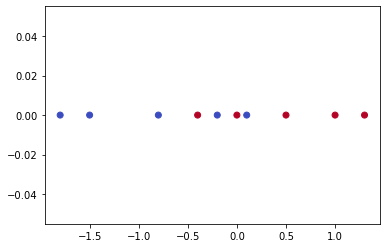

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1.8,-1.5,-0.8,-0.4,-0.2, 0.0, 0.1, 0.5, 1.0, 1.3])
y = np.array([ 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,  1.0, 1.0, 1.0])
yh = np.array([ -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0])

plt.scatter(x,np.zeros(10), c=y,cmap=plt.cm.coolwarm)

In [19]:
# Treinando um classificador para diferenciar 2 classes (0 e 1)
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='lbfgs')
logr.fit(x.reshape(-1, 1), y)

# vamos pegar as probabilidades de cada elemento pertencer a classe 1
y_hat = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()

# pegando as probabilidades de saída
print('y     = {}'.format(np.round(y , 3)))
print('y_hat = {}'.format(np.round(y_hat, 3)))

y     = [0. 0. 0. 1. 0. 1. 0. 1. 1. 1.]
y_hat = [0.133 0.178 0.325 0.433 0.49  0.547 0.576 0.682 0.792 0.843]


In [20]:
# classificando para calcular a perda 0-1
y_clas = y_hat.copy()
y_clas[y_clas>=0.5] = 1
y_clas[y_clas<0.5] = 0

# calculando a saída hinge, entre -1 e 1
y_hat_hi = (y_hat-0.5)*2
print('y_hat_hi= {}'.format(np.round(y_hat_hi, 3)))

# perda quadrática
loss_qu = np.power(y-y_hat,2)
# perda de entropia cruzada
loss_ec = -(y*np.log(y_hat+.00001) + (1-y)*np.log(1-y_hat +.00001))
# perda zero-um
loss_01 = (y!=y_clas)*1

# perda hinge
hi_mult = 1-(yh*y_hat_hi)
loss_hi = [max(0,mi) for mi in hi_mult]
print('1-y*y_hat= {}'.format(np.round(hi_mult, 3)))

y_hat_hi= [-0.735 -0.645 -0.349 -0.134 -0.02   0.095  0.151  0.365  0.585  0.687]
1-y*y_hat= [0.265 0.355 0.651 1.134 0.98  0.905 1.151 0.635 0.415 0.313]


In [21]:
print("Perdas calculadas por instância:")
print(np.round(loss_qu,3))
print(np.round(loss_ec,3))
print(np.round(loss_01,3))
print(np.round(loss_hi,3))
print()

print("Perda quadrática = %.4f" % (np.mean(loss_qu)))
print("Entropia cruzada = %.4f" % (np.mean(loss_ec)))
print("Perda 0-1        = %.4f" % (np.mean(loss_01)))
print("Perda hinge/svm  = %.4f" % (np.mean(loss_hi)))

Perdas calculadas por instância:
[0.018 0.032 0.106 0.321 0.24  0.205 0.331 0.101 0.043 0.025]
[0.142 0.195 0.394 0.837 0.674 0.603 0.857 0.382 0.233 0.17 ]
[0 0 0 1 0 0 1 0 0 0]
[0.265 0.355 0.651 1.134 0.98  0.905 1.151 0.635 0.415 0.313]

Perda quadrática = 0.1421
Entropia cruzada = 0.4487
Perda 0-1        = 0.2000
Perda hinge/svm  = 0.6805


---

### Exercício 10)

Carregue a base de dados Fashion MNIST

Crie duas redes neurais utilizando os blocos Residuais e módulos Inception conforme visto em aula.

* InceptionNet
    * Módulo Inception V1 com número de filtros: 32, 32, 32, 32, 32, 16
    * Maxpooling com pool=2, stride=2
    * Módulo Inception V1 com número de filtros: 32, 64, 64, 64, 64, 16
    * Maxpooling com pool=2, stride=2
* ResNet
    * 3 blocos residuais com 64 filtros, cada um seguido por camada Maxpooling com pool=2, stride=2

Ambos devem possuir uma camada `GlobalAveragePooling2D` antes da camada de predição.

Treine ambas com SGD, learning rate 0.02 e momentum 0.8, utilizando batchsize 32, e apenas as 1000 primeiras imagens do dataset de treinamento (use :1000), por 80 épocas. Antes de compilar e treinar cada modelo, defina as sementes numpy e tensorflow de forma fixa para 1.

Exiba o gráfico da perda ao longo das épocas para as duas arquiteturas, e ao final compute e mostre a perda e a acurácia no treinamento (1000 imagens) e num conjunto de validação formado pelas próximas 1000 imagens de treinamento (use 1000:2000). 

Marque a alternativa que melhor se encaixa no resultado observado e sua conclusão.

(a) Ambas convergem rapidamente para esse subconjunto e se ajustam aos dados de treinamento, mas falham em generalizar para o conjunto de validação<br>
(b) A Inception converge mais rapidamente quando comparda à ResNet e se ajusta perfeitamente aos dados de treinamento, mas com perda mais alta calculada na validação, indicando overfitting, enquanto a ResNet generaliza melhor e poderia ser treinada por mais épocas<br>
<font color='red'>(c) A ResNet converge mais rapidamente quando comparada à Inception e se ajusta perfeitamente aos dados de treinamento, mas com perda mais alta calculada na validação, indicando overfitting, enquanto a Inception generaliza melhor e poderia ser treinada por mais épocas</font><br>
(d) A ResNet converge mais rapidamente quando comparada à Inception e se ajusta perfeitamente aos dados de treinamento. Ambas possuem generalização similar o conjunto de validação.<br>

In [22]:
# carregando datasets do keras
#from tensorflow.keras.datasets import mnist

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# obtendo informações das imagens (resolucao) e dos rótulos (número de classes)
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))

print(x_train.shape)

# dividir por 255 para obter normalizacao
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# transformar categorias em one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# verifica imagens da base de dados tem 3 canais (RGB) ou apenas 1 (escala de cinza)
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formata o array de forma a encontrar o formato da entrada (input_shape)
# se a dimensão dos canais vem primeiro ou após a imagem
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

print("Shape: ", input_shape)
print("Número de Classes: ", num_classes)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
Shape:  (28, 28, 1)


In [24]:
num_classes

10

In [25]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import add

Arquitetura Inception

Módulo Inception V1 com número de filtros: 32, 32, 32, 32, 32, 16<br>
Maxpooling com pool=2, stride=2<br>
Módulo Inception V1 com número de filtros: 32, 64, 64, 64, 64, 16<br>
Maxpooling com pool=2, stride=2<br>
GlobalAveragePooling2D antes da camada de predição<br>

In [26]:
def inception_module(layer_in, f1_out, f2_in, f2_out, f3_in, f3_out, f4_out):
    # 1x1 conv
    conv1 = Conv2D(f1_out, (1,1), padding='same', activation='relu')(layer_in)
    # 3x3 conv
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    # 5x5 conv
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
    # 3x3 max pooling
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out
 
# definir entrada
input_layer = Input(shape=input_shape)
# adicionar módulos inception
layer1 = inception_module(input_layer, 32, 32, 32, 32, 32, 16)
pool1 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer1) #
layer2 = inception_module(pool1, 32, 64, 64, 64, 64, 16) # rem?
pool2 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer2)
flatt = keras.layers.GlobalAveragePooling2D()(pool2)

softmax = keras.layers.Dense(num_classes, activation='softmax')(flatt)

# cria modelo definindo camada de entrada e camada de saída
Inception = keras.models.Model(inputs=input_layer, outputs=softmax)
Inception.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 28, 28, 1)    0           input_1[0][0]                    
______________________________________________________________________________________________

Arquitetura ResNet

3 blocos residuais com 64 filtros, cada um seguido por camada Maxpooling com pool=2, stride=2<br>
1 camada GlobalAveragePooling2D antes da camada de predição.<br>

In [27]:
from tensorflow.keras.layers import add

# funcao que retorna um bloco residual
# merge_input é criada para possibilitar a concatenação caso as dimensões sejam diferentes
# kernel_initializer 'he_normal' é para tipificar a rede como residual
# activation 'linear' é importante para poder fazer a soma depois
# função de ativação de saída pode ser 'relu' porque a camada 'add' não tem função de ativação

def residual_block(layer_in, n_filters):
    merge_input = layer_in
    #verifica se é necessária uma primeira camada para deixar o número de filtros iguais para adição
    if layer_in.shape[-1] != n_filters:
        merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    # conv1
    conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    # conv2
    conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
    # soma entrada com saída (pulou 2 camadas)
    layer_out = add([conv2, merge_input])
    # função de ativação da saída do bloco
    layer_out = keras.layers.Activation('relu')(layer_out)
    return layer_out
 

input_layer = Input(shape=input_shape)
layer1 = residual_block(input_layer, 64)
pool1 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer1)
layer2 = residual_block(pool1, 64)
pool2 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer2)
layer3 = residual_block(pool2, 64)
pool3 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer3)
flatt = keras.layers.GlobalAveragePooling2D()(pool3)
softmax = keras.layers.Dense(num_classes, activation='softmax')(flatt)

ResNet = keras.models.Model(inputs=input_layer, outputs=softmax)
ResNet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 28, 28, 64)   640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 28, 28, 64)   36928       conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 28, 28, 64)   128         input_2[0][0]                    
____________________________________________________________________________________________

Treinamento

Treine ambas com SGD, learning rate 0.02 e momentum 0.8, utilizando batchsize 32, e apenas as 1000 primeiras imagens do dataset de treinamento (use :1000), por 80 épocas. Antes de compilar e treinar cada modelo, defina as sementes numpy e tensorflow de forma fixa para 1.

In [28]:
x_sub = x_train[:1000]
y_sub = y_train[:1000]

x_val = x_train[1000:2000]
y_val = y_train[1000:2000]

batch_size = 32
epochs = 80

In [36]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
seed(1)
set_seed(1)

Inception.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.02, momentum=0.8),
              metrics=['accuracy'])

histInc = Inception.fit(x_sub, y_sub,
                    batch_size=batch_size,
                    epochs=epochs, verbose=0)

In [37]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
seed(1)
set_seed(1)

ResNet.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.02, momentum=0.8),
              metrics=['accuracy'])

histResNet = ResNet.fit(x_sub, y_sub,
                    batch_size=batch_size,
                    epochs=epochs, verbose=0)

Resultados

Exiba o gráfico da perda ao longo das épocas para as duas arquiteturas, e ao final compute e mostre a perda e a acurácia no treinamento (1000 imagens) e num conjunto de validação formado pelas próximas 1000 imagens de treinamento (use 1000:2000).

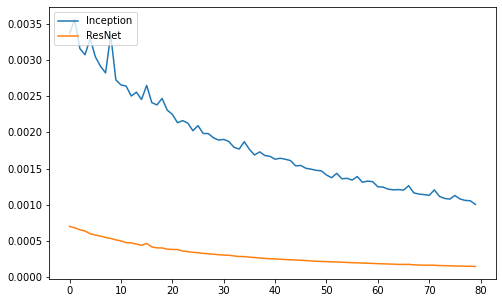

In [38]:
plt.figure(figsize=(8,5))
plt.plot(histInc.history['loss'])
plt.plot(histResNet.history['loss'])
plt.legend(["Inception", "ResNet"], loc="upper left")

In [39]:
score_inception_train = Inception.evaluate(x_sub, y_sub, verbose = 0)
score_resnet_train = ResNet.evaluate(x_sub, y_sub, verbose = 0)

score_inception_val = Inception.evaluate(x_val, y_val, verbose = 0)
score_resnet_val = ResNet.evaluate(x_val, y_val, verbose = 0)

In [40]:
print("Inception Treinamento = Loss %.3f, Accuracy %.3f" % (score_inception_train[0], score_inception_train[1]))
print("Inception Validação   = Loss %.3f, Accuracy %.3f" % (score_inception_val[0], score_inception_val[1]))

print("ResNet Treinamento    = Loss %.3f, Accuracy %.3f" % (score_resnet_train[0], score_resnet_train[1]))
print("ResNet Validação      = Loss %.3f, Accuracy %.3f" % (score_resnet_val[0], score_resnet_val[1]))

Inception Treinamento = Loss 0.001, Accuracy 1.000
Inception Validação   = Loss 0.658, Accuracy 0.875
ResNet Treinamento    = Loss 0.000, Accuracy 1.000
ResNet Validação      = Loss 1.411, Accuracy 0.830
